# Convex Optimization
## Tutorial 10
### Tanmay Garg CS20BTECH11063

In [1]:
#Importing required Libraries
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import math

In [2]:
#Main function

theta_deg = 15.0
theta = theta_deg*math.pi/180.0

sin_cos_Matrix = np.array([[-math.sin(theta), math.sin(theta)], [math.cos(theta), math.cos(theta)]])

T_max = 2.0
mass_load = 0.1
gravity = np.array([0, -9.8])
p_init = np.array([0, 0])
p_des = np.array([10.0, 2.0])
v_init = 0
h = 0.1
T_final = 0
P_final = 0

L = 0
U = 100
while U-L>1:
    time_k = int((U+L)/2)
    p = cp.Variable((time_k, 2))
    v = cp.Variable((time_k, 2))
    Tension = cp.Variable((time_k-1, 2))

    Force = Tension@sin_cos_Matrix.T + mass_load * np.tile(gravity, (time_k - 1, 1))

    # print("shape of P: ",p.shape)
    # print("shape of v: ",v.shape)
    # print("shape of ten: ",Tension.shape)
    # print("shape of Force: ",Force.shape)
    

    MyConstraits = [
        Tension >= 0,
        Tension <= T_max,
        p[0, :] == p_init,
        p[time_k-1, :] == p_des,
        v[0, :] == 0,
        v[time_k-1, :] == 0,
        v[1:time_k, :] == v[0:time_k-1, :] + h * Force/mass_load,
        p[1:time_k, :] == p[0:time_k-1, :] + h * v[0:time_k-1, :]
    ]
    MyProblem = cp.Problem(cp.Minimize(0), MyConstraits)

    final_val = MyProblem.solve(solver=cp.ECOS)
    # print(final_val)

    # print("Value of v: ",v.value)
    # print("Value of p: ",p.value)
    # print("Value of Tension: ",Tension.value)
    # print("Value of Force: ",Force.value)
    # print("------------------------------------------------------------")
    if final_val == 0:
        U = time_k
        T_final = Tension.value
        P_final = p.value
    else:
        L = time_k
time_k = U
# print(U)
# print(L)
print("The value of k: ", time_k)

The value of k:  34


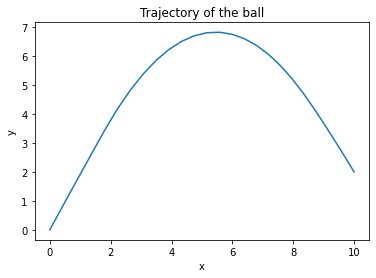

In [3]:
plt.figure()
plt.plot(P_final[:, 0], P_final[:, 1])
plt.title("Trajectory of the ball")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

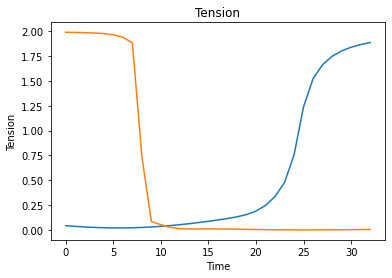

In [4]:
plt.figure()
plt.plot(T_final)
plt.title("Tension")
plt.xlabel("Time")
plt.ylabel("Tension")
plt.show()
